## Begin to conduct a full exploratory data analysis on your chosen dataset. This means:
Load and inspect your data
Read in your CSV file using pd.read_csv()
Get a sense of the structure
Ask and investigate initial questions
  What are the columns and what types of data do they contain?
  Are there obvious patterns or distributions worth looking at?
  What questions are you curious about?
Create visualizations
(Use Matplotlib and/or Seaborn to create 1 or 2 plots to help you understand the data)
Document your process
Commit your work regularly
Your Project Folder Should Include:
  A data/ folder with your dataset
  A notebooks/ folder with your working .ipynb file

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

## Load the dataset 
#  Renamed the original csv to something more easy to use

In [7]:
df = pd.read_csv('../data/kentucky_shelter_data.csv')

# Preview and Analyze the data structure

In [8]:
df.head()

,kennel,animalid,jurisdiction,intype,insubtype,indate,surreason,outtype,outsubtype,outdate,animaltype,sex,bites,petsize,color,breed,sourcezipcode,ObjectId
0,408,A688221,40216,STRAY,OTC,2021-01-17 00:00:00,STRAY,TRANSPORT,RESCUE GRP,2021-02-06 00:00:00,DOG,M,N,PUPPY,BR BRINDLE,CHIHUAHUA SH / MIX,40218,1
1,ID07,A688234,40222,STRAY,OTC,2021-01-18 00:00:00,STRAY,RTO,IN FIELD,2021-01-18 00:00:00,DOG,N,N,MED,BR BRINDLE / WHITE,BOSTON TERRIER / MIX,40205,2
2,DW13,A688337,40118,STRAY,OTC,2021-01-21 00:00:00,STRAY,RTO,IN KENNEL,2021-01-23 00:00:00,DOG,S,N,LARGE,WHITE / BROWN,CATAHOULA / MIX,40118,3
3,INTAKE,A688419,40204,STRAY,OTC,2021-02-03 00:00:00,STRAY,TNR,CARETAKER,2021-02-04 00:00:00,CAT,S,N,MED,BLK TABBY,DOMESTIC SH,40204,4
4,INTAKE,A688478,40214,STRAY,OTC,2021-02-10 00:00:00,STRAY,TNR,CARETAKER,2021-02-11 00:00:00,CAT,N,N,MED,TORTIE,DOMESTIC SH,40210,5


In [9]:
df.describe()

,ObjectId
count,60343.000000
mean,30172.000000
std,17419.667984
min,1.000000
25%,15086.500000
50%,30172.000000
75%,45257.500000
max,60343.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60343 entries, 0 to 60342
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   kennel         60343 non-null  object
 1   animalid       60343 non-null  object
 2   jurisdiction   47038 non-null  object
 3   intype         60343 non-null  object
 4   insubtype      60216 non-null  object
 5   indate         60343 non-null  object
 6   surreason      47038 non-null  object
 7   outtype        46755 non-null  object
 8   outsubtype     37967 non-null  object
 9   outdate        46789 non-null  object
 10  animaltype     60343 non-null  object
 11  sex            59318 non-null  object
 12  bites          47053 non-null  object
 13  petsize        57919 non-null  object
 14  color          60342 non-null  object
 15  breed          60267 non-null  object
 16  sourcezipcode  50868 non-null  object
 17  ObjectId       60343 non-null  int64 
dtypes: int64(1), object(17)
me

In [11]:
df.columns

Index(['kennel', 'animalid', 'jurisdiction', 'intype', 'insubtype', 'indate',
       'surreason', 'outtype', 'outsubtype', 'outdate', 'animaltype', 'sex',
       'bites', 'petsize', 'color', 'breed', 'sourcezipcode', 'ObjectId'],
      dtype='object')

In [12]:
df.shape

(60343, 18)

In [13]:
df.dtypes

kennel           object
animalid         object
jurisdiction     object
intype           object
insubtype        object
indate           object
surreason        object
outtype          object
outsubtype       object
outdate          object
animaltype       object
sex              object
bites            object
petsize          object
color            object
breed            object
sourcezipcode    object
ObjectId          int64
dtype: object

# Data Clean Up
# Rename Columns
# Check for Missing Data
# Count of Missing Data
# Drop columns not needed for analysis
# Drop rows missing critical info
# Check for duplicates
# Drop Duplicates
# Convert date columns to datetime format

In [14]:
# Assign a new list of column names
df.columns = ["kennelId", "animalId", "jurisdiction", "intakeReason", "intakeSubtype", "intakeDate", "surrenderReason", "outcome", "outcomeSubType", "outcomeDate", "animalType", "sex", "bites", "petSize", "color", "breed", "zipCode", "objectId"]

In [15]:
# check for missing data
df.isna()

,kennelId,animalId,jurisdiction,intakeReason,intakeSubtype,intakeDate,surrenderReason,outcome,outcomeSubType,outcomeDate,animalType,sex,bites,petSize,color,breed,zipCode,objectId
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60338,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60339,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60340,False,False,True,False,False,False,True,True,True,True,False,False,True,False,False,False,True,False
60341,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [16]:
# count of missing data
df.isna().sum()

kennelId               0
animalId               0
jurisdiction       13305
intakeReason           0
intakeSubtype        127
intakeDate             0
surrenderReason    13305
outcome            13588
outcomeSubType     22376
outcomeDate        13554
animalType             0
sex                 1025
bites              13290
petSize             2424
color                  1
breed                 76
zipCode             9475
objectId               0
dtype: int64

In [18]:
# check for duplicates
df.duplicated(keep = False)

0        False
1        False
2        False
3        False
4        False
         ...  
60338    False
60339    False
60340    False
60341    False
60342    False
Length: 60343, dtype: bool

In [19]:
df.duplicated(keep = False).sum()

np.int64(0)

In [22]:
# Convert date columns to datetime format
df['indate'] = pd.to_datetime(df['intakeDate'], errors='coerce')

df['outdate'] = pd.to_datetime(df['outcomeDate'], errors='coerce')

print(df.indate, df.outdate)

0       2021-01-17
1       2021-01-18
2       2021-01-21
3       2021-02-03
4       2021-02-10
           ...    
60338   2023-08-11
60339   2023-08-15
60340   2023-08-18
60341   2023-08-19
60342   2024-06-28
Name: indate, Length: 60343, dtype: datetime64[ns] 0       2021-02-06
1       2021-01-18
2       2021-01-23
3       2021-02-04
4       2021-02-11
           ...    
60338   2023-10-03
60339   2023-09-18
60340          NaT
60341   2023-08-29
60342   2024-07-03
Name: outdate, Length: 60343, dtype: datetime64[ns]


In [23]:
# Drop columns not needed for analysis
df = df.drop(columns=["kennelId", "jurisdiction", "zipCode", "objectId"])

In [24]:
# validate columns were droppped
df.columns

Index(['animalId', 'intakeReason', 'intakeSubtype', 'intakeDate',
       'surrenderReason', 'outcome', 'outcomeSubType', 'outcomeDate',
       'animalType', 'sex', 'bites', 'petSize', 'color', 'breed', 'indate',
       'outdate'],
      dtype='object')

In [31]:
# Fill in null data for analysis fields
# df["intakeSubtype"] = df["intakeSubtype"].fillna("unknown")
# df["surrenderReason"] = df["surrenderReason"].fillna("none")

df = df.fillna({
    "intakeSubtype": "unknown",
    "surrenderReason": "none",
    "sex": "unspecified",
    "bites": "unspecified",
    "petSize": "unspecified",
    "color": "unspecified",
    "breed": "unknown"
})


In [32]:
# count of missing data again before dropping
df.isna().sum()

animalId               0
intakeReason           0
intakeSubtype          0
intakeDate             0
surrenderReason        0
outcome            13588
outcomeSubType     22376
outcomeDate        13554
animalType             0
sex                    0
bites                  0
petSize                0
color                  0
breed                  0
indate                 0
outdate            13554
dtype: int64

# Analysis I would like to accomplish with the data
# 1. Most common outcome type by animal type
# 2. Adoption rates by animal type
# 3. Intake types count
# 4. Age group effect on outcomes
# 5. Age by Outcome Type by Animal Type
# 6. Rates of adoption by day of week

# Most common outcome type by animal type
I wanted to determine the most common outcome type overall. 

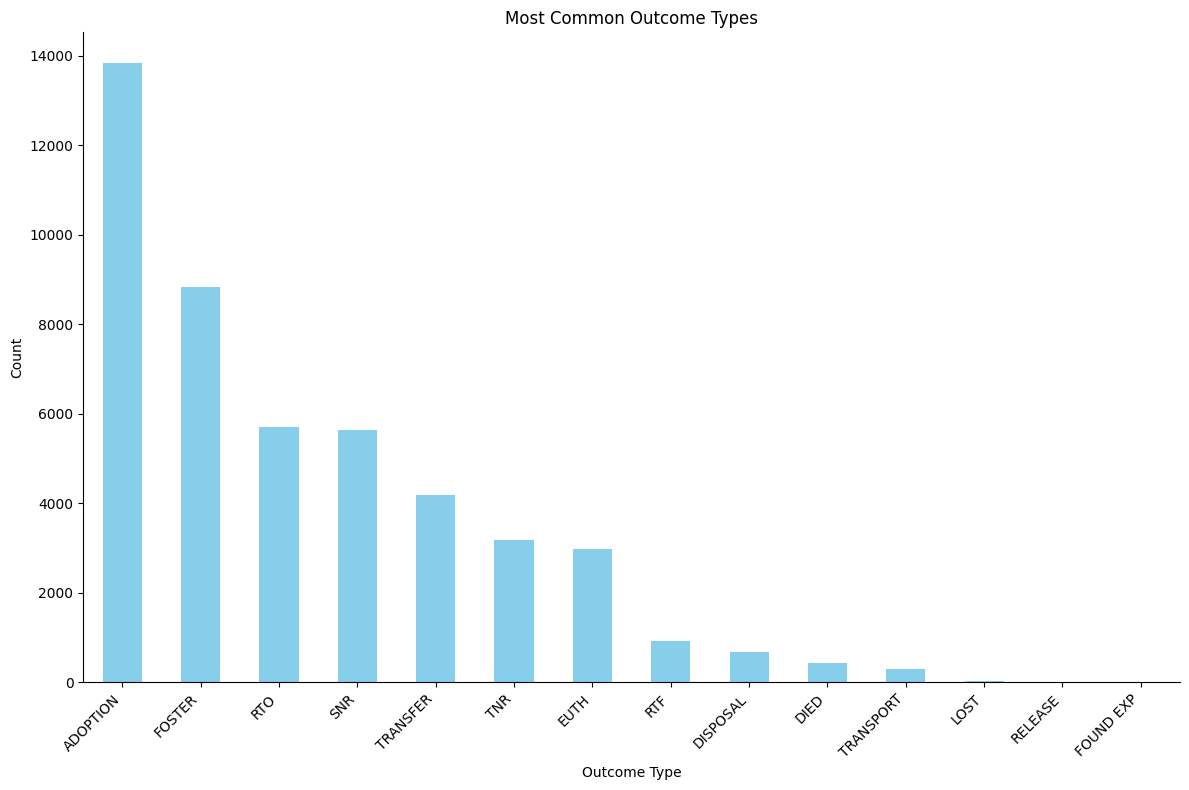

In [44]:
plt.figure(figsize=(12,8))
df['outcome'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Common Outcome Types')
plt.xlabel('Outcome Type')
plt.ylabel('Count')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.show()

# 2. Adoption rates by animal type

With adoption being the most common outcome, I now wanted to see the split between cats and dogs.

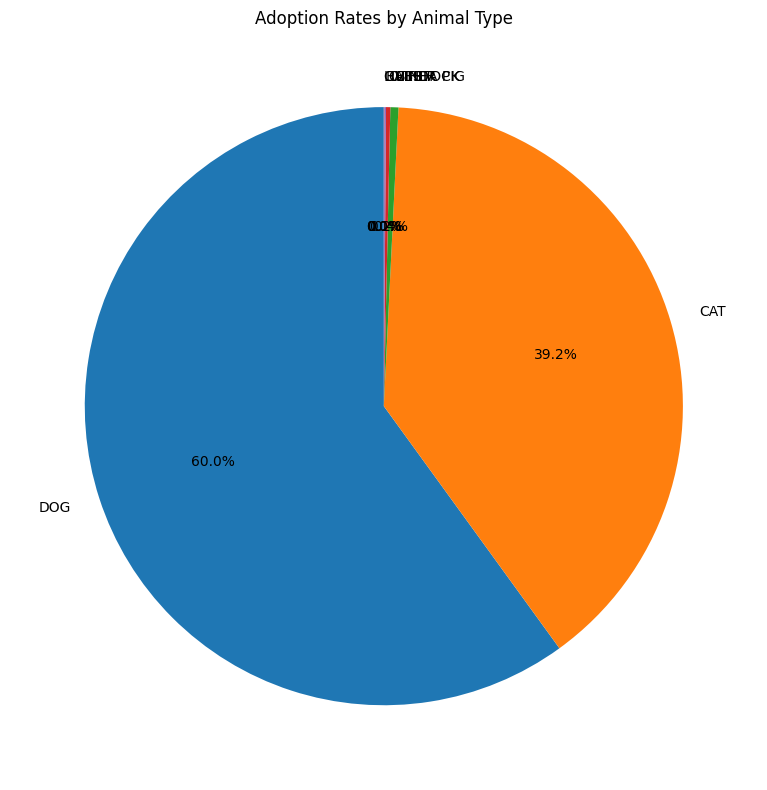

In [36]:
adopted = df[df['outcome'].str.lower() == 'adoption']
plt.figure(figsize=(12,8))
adopted['animalType'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Adoption Rates by Animal Type')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 3. Intake types count
I wanted to see the main reasons for animal surrender.

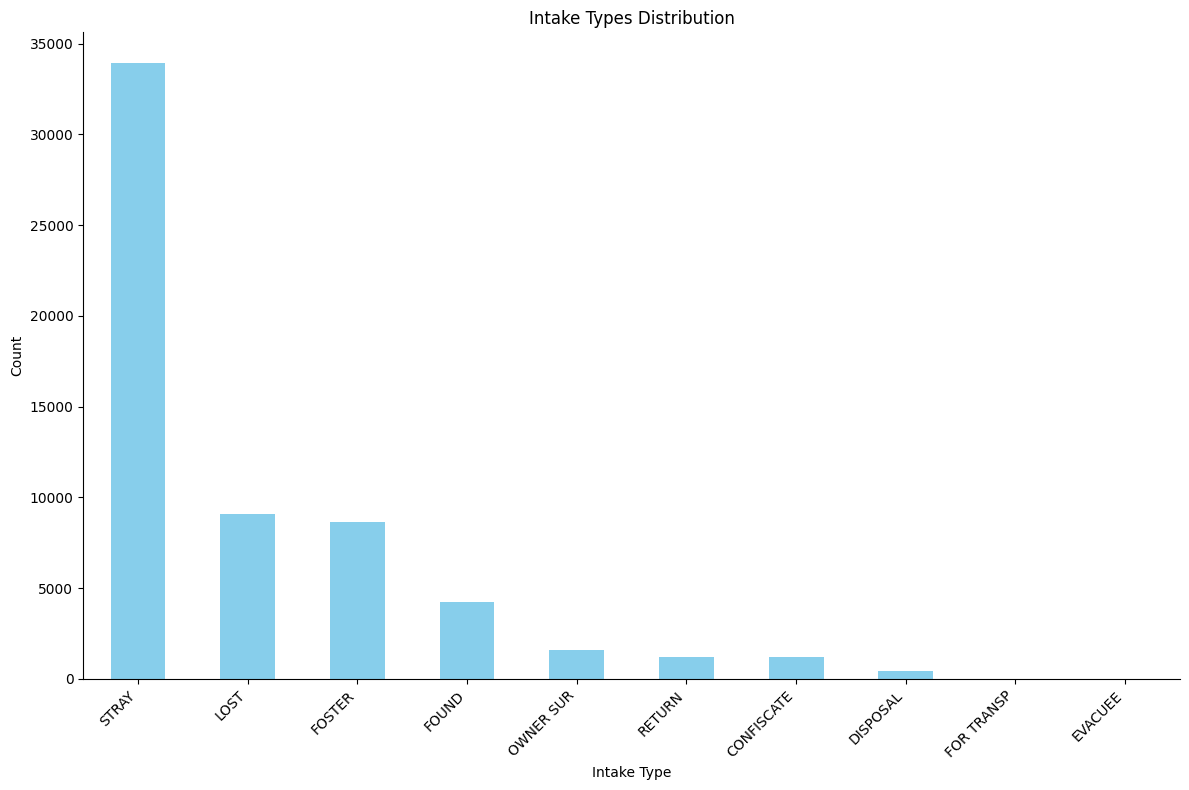

In [43]:
plt.figure(figsize=(12,8))
df['intakeReason'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Intake Types Distribution')
plt.xlabel('Intake Type')
plt.ylabel('Count')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.show()